# Lab

##### Objective : The main purpose behind this lab is to get familiar with NLP Word embedding.

The dataset used is data of Hadiths scrapped from various pages of the website https://mawdoo3.com/ the raw data was stored in a MongoDB database, and I applied Natural Language Processing (NLP) techniques on the scraped text. The NLP pipeline includes processes such as text cleaning, tokenization, stemming, lemmatization using different libraries, Part-of-Speech (POS) tagging, and Named Entity Recognition (NER).
Here is the link of the repo of the full project : https://github.com/elmezianech/Hadiths-Scrapper-NLP-Pipeline

Here in this part of applying word embedding on the same dataset, I choosed to use the data cleaned and tokenized, you can find the json file in the repo of the project

## Part 2: word Embedding :

In [1]:
import json

# Specify the path to your JSON file
json_file_path = 'tokenized_data.json'

# Open the JSON file and load its contents
with open(json_file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# You can access the data like you would with any Python dictionary
print(data)

[['مات', 'الإنسان', 'انقطع', 'عنه', 'عمله', 'صدقة', 'جارية', 'ينتفع', 'ولد', 'صالح', 'يدعو'], ['سلوا', 'الله', 'علما', 'نافعا', 'وتعوذوا', 'بالله', 'ينفع'], ['سيأتيكم', 'أقوام', 'يطلبون', 'العلم', 'رأيتموهم', 'فقولوا', 'مرحبا', 'مرحبا', 'بوصية', 'رسول', 'الله', 'صلى', 'الله', 'وسلم', 'واقنوهم'], ['جاء', 'مسجدي', 'يأته', 'لخير', 'يتعلمه', 'يعلمه', 'فهو', 'بمنزلة', 'المجاهد', 'سبيل', 'الله', 'جاء', 'لغير', 'فهو', 'بمنزلة', 'الرجل', 'ينظر', 'متاع', 'غيره'], ['نضر', 'الله', 'امرأ', 'سمع', 'منا', 'حديثا', 'فحفظه', 'يبلغه', 'غيره', 'فرب', 'حامل', 'فقه', 'بفقيه', 'ورب', 'حامل', 'فقه', 'أفقه'], ['طلب', 'العلم', 'فريضة', 'مسلم'], ['فضل', 'العلم', 'أحب', 'إلي', 'فضل', 'العبادة', 'وخير', 'دينكم', 'الورع'], ['اللهم', 'بارك', 'لأمتي', 'بكورها', 'قال', 'وكان', 'بعث', 'سرية', 'جيشا', 'بعثهم', 'النهار', 'وكان', 'صخر', 'رجلا', 'تاجرا', 'وكان', 'بعث', 'تجارة', 'بعثهم', 'النهار', 'فأثرى', 'وكثر', 'ماله'], ['خرج', 'يسعى', 'ولده', 'صغارا', 'فهو', 'سبيل', 'الله', 'خرج', 'يسعى', 'أبوين', 'شيخين',

### 1- One hot encoding

In [2]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize one-hot encoder
encoder = OneHotEncoder()

# Fit and transform documents
encoded_docs = encoder.fit_transform([[word] for doc in data for word in doc])

# Convert the encoded matrix to a DataFrame
encoded_df = pd.DataFrame(encoded_docs.toarray(), columns=encoder.get_feature_names_out())

# Save the DataFrame to a CSV file
encoded_df.to_csv('outputs/onehot_encoded_results.csv', index=False)

# Display the DataFrame
print(encoded_df)

      x0_ابن  x0_ابني  x0_اتبع  x0_اثنتان  x0_اثنتين  x0_اجتمع  x0_احرص  \
0        0.0      0.0      0.0        0.0        0.0       0.0      0.0   
1        0.0      0.0      0.0        0.0        0.0       0.0      0.0   
2        0.0      0.0      0.0        0.0        0.0       0.0      0.0   
3        0.0      0.0      0.0        0.0        0.0       0.0      0.0   
4        0.0      0.0      0.0        0.0        0.0       0.0      0.0   
...      ...      ...      ...        ...        ...       ...      ...   
5905     0.0      0.0      0.0        0.0        0.0       0.0      0.0   
5906     0.0      0.0      0.0        0.0        0.0       0.0      0.0   
5907     0.0      0.0      0.0        0.0        0.0       0.0      0.0   
5908     0.0      0.0      0.0        0.0        0.0       0.0      0.0   
5909     0.0      0.0      0.0        0.0        0.0       0.0      0.0   

      x0_ارجع  x0_ارحمهما  x0_ازدادوا  ...  x0_ينعم  x0_ينفر  x0_ينفع  \
0         0.0         0.0 

### 2- Bag of Words (CountVectorizer)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

# Join the tokenized words into sentences
tokenized_sentences = [' '.join(doc) for doc in data]

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform documents
bag_of_words = vectorizer.fit_transform(tokenized_sentences)

# Convert the bag of words matrix to a DataFrame
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())

# Save the DataFrame to a CSV file
bow_df.to_csv('outputs/bag_of_words_results.csv', index=False)

# Display the DataFrame
print(bow_df)

     ابن  ابني  اتبع  اثنتان  اثنتين  اجتمع  احرص  ارجع  ارحمهما  ازدادوا  \
0      0     0     0       0       0      0     0     0        0        0   
1      0     0     0       0       0      0     0     0        0        0   
2      0     0     0       0       0      0     0     0        0        0   
3      0     0     0       0       0      0     0     0        0        0   
4      0     0     0       0       0      0     0     0        0        0   
..   ...   ...   ...     ...     ...    ...   ...   ...      ...      ...   
387    0     0     0       0       0      0     0     0        0        0   
388    0     0     0       0       0      0     0     0        0        0   
389    0     0     0       0       0      0     0     0        0        0   
390    0     0     0       0       0      0     0     0        0        0   
391    0     0     0       0       0      0     0     0        0        0   

     ...  ينعم  ينفر  ينفع  ينفعك  يو  يوصيكم  يوطي  يوم  يومه  ييبسا  
0  

### 3- TF-IDF (TfidfVectorizer)

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join the tokenized words into sentences
tokenized_sentences = [' '.join(doc) for doc in data]

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform documents
tfidf_matrix = tfidf_vectorizer.fit_transform(tokenized_sentences)

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Save the DataFrame to a CSV file
tfidf_df.to_csv('outputs/tfidf_results.csv', index=False)

# Display the DataFrame
print(tfidf_df)

     ابن  ابني  اتبع  اثنتان  اثنتين  اجتمع  احرص  ارجع  ارحمهما  ازدادوا  \
0    0.0   0.0   0.0     0.0     0.0    0.0   0.0   0.0      0.0      0.0   
1    0.0   0.0   0.0     0.0     0.0    0.0   0.0   0.0      0.0      0.0   
2    0.0   0.0   0.0     0.0     0.0    0.0   0.0   0.0      0.0      0.0   
3    0.0   0.0   0.0     0.0     0.0    0.0   0.0   0.0      0.0      0.0   
4    0.0   0.0   0.0     0.0     0.0    0.0   0.0   0.0      0.0      0.0   
..   ...   ...   ...     ...     ...    ...   ...   ...      ...      ...   
387  0.0   0.0   0.0     0.0     0.0    0.0   0.0   0.0      0.0      0.0   
388  0.0   0.0   0.0     0.0     0.0    0.0   0.0   0.0      0.0      0.0   
389  0.0   0.0   0.0     0.0     0.0    0.0   0.0   0.0      0.0      0.0   
390  0.0   0.0   0.0     0.0     0.0    0.0   0.0   0.0      0.0      0.0   
391  0.0   0.0   0.0     0.0     0.0    0.0   0.0   0.0      0.0      0.0   

     ...  ينعم  ينفر      ينفع  ينفعك   يو  يوصيكم  يوطي       يوم  يومه  \

### Word2Vec Approaches

#### 1- Skip-gram Approach

In [5]:
from gensim.models import Word2Vec

# Define Word2Vec model parameters for Skip-gram
vector_size = 100  # Dimensionality of word vectors
window = 5  # Maximum distance between the current and predicted word within a sentence
min_count = 1  # Ignores all words with total frequency lower than this
sg = 1  # Use Skip-gram approach

# Initialize and train the Word2Vec model with Skip-gram
model_skipgram = Word2Vec(sentences=data, vector_size=vector_size, window=window, min_count=min_count, sg=sg)

# Get the word vector for a specific word using Skip-gram
word_vector_skipgram = model_skipgram.wv['الجنة']

# Find similar words to a given word using Skip-gram
similar_words_skipgram = model_skipgram.wv.most_similar('الجنة')

# Print the word vector and similar words using Skip-gram
print("Word vector for 'الجنة' using Skip-gram:", word_vector_skipgram)
print("Similar words to 'الجنة' using Skip-gram:", similar_words_skipgram)

Word vector for 'الجنة' using Skip-gram: [-0.0738438   0.12102547  0.02243635  0.01602671  0.05962215 -0.11965892
  0.06107512  0.19087751 -0.07168814 -0.08255233 -0.02208714 -0.12795275
 -0.02521587  0.06048899  0.02420575 -0.06408106  0.00058609 -0.07656817
 -0.02650568 -0.16222455  0.02803427  0.04211234  0.07530659 -0.06108759
 -0.01395485 -0.05460082 -0.07745348 -0.08058833 -0.09344617 -0.00167921
  0.0709644   0.01424843 -0.02117647 -0.07593451 -0.00210962  0.05675553
  0.01353077 -0.10974976 -0.04754467 -0.11059719 -0.0635267  -0.02134984
 -0.00509787  0.02365684  0.02583393 -0.0411782  -0.01751443  0.00889561
  0.03819619  0.09293666  0.02406036 -0.11293978 -0.09136425 -0.02999502
 -0.08510966  0.02144909  0.05944524  0.00743568 -0.13249059  0.02210717
  0.05184232  0.01967811 -0.02219043 -0.02312304 -0.13033134  0.05507706
  0.02431551  0.07896905 -0.09881043  0.14177865 -0.00588316  0.06692012
  0.10709313 -0.05693239  0.0825002   0.0024944   0.01063862 -0.02375503
 -0.017112

#### 2- Continuous Bag of Words (CBOW) Approach

In [6]:
from gensim.models import Word2Vec

# Define Word2Vec model parameters for CBOW
vector_size = 100  # Dimensionality of word vectors
window = 5  # Maximum distance between the current and predicted word within a sentence
min_count = 1  # Ignores all words with total frequency lower than this
sg = 0  # Use CBOW approach

# Initialize and train the Word2Vec model with CBOW
model_cbow = Word2Vec(sentences=data, vector_size=vector_size, window=window, min_count=min_count, sg=sg)

# Get the word vector for a specific word using CBOW
word_vector_cbow = model_cbow.wv['الجنة']

# Find similar words to a given word using CBOW
similar_words_cbow = model_cbow.wv.most_similar('الجنة')

# Print the word vector and similar words using CBOW
print("Word vector for 'الجنة' using CBOW:", word_vector_cbow)
print("Similar words to 'الجنة' using CBOW:", similar_words_cbow)

Word vector for 'الجنة' using CBOW: [-2.5673483e-03  8.0276234e-03 -4.4659744e-03 -1.7117179e-04
  8.6638536e-03  1.8856843e-03 -1.5621530e-03  1.1548411e-02
 -1.1299353e-02  2.7930215e-03 -4.6939547e-03 -1.0692446e-02
  7.6231444e-03  4.5052981e-03  9.2649134e-03 -1.0244170e-02
  6.1058928e-03  4.0898449e-03 -8.9296428e-03 -1.4515503e-02
 -4.7142236e-03 -2.2633921e-03 -9.0559124e-04 -1.0075282e-02
  5.7085878e-03 -7.4240118e-03  4.5507629e-03  2.2029937e-03
 -1.0698208e-02  2.4606269e-03  1.0475787e-02 -7.4338489e-03
 -9.3399333e-03 -7.0658200e-03 -8.7916041e-03  1.6668417e-03
  6.2289345e-04 -1.5964799e-03 -1.7284969e-03 -7.4821329e-03
 -8.6769313e-03  1.3012149e-03 -1.2669025e-03  7.1560317e-03
  5.3778146e-03  1.4780012e-03 -7.2493771e-05 -3.2761947e-03
 -2.3255721e-03  4.9727014e-03  1.5304189e-03 -6.9249002e-03
 -1.0945953e-02 -7.4831415e-03 -1.3326876e-02 -2.9709071e-03
  8.5794635e-04 -4.9917372e-03 -1.2250102e-02 -2.9801340e-03
  3.6964780e-03 -1.7873360e-03  6.6367523e-03  1.

### Word embedding approaches

#### GloVe Approach

I used this model for Glove trained on the arabic corpus : https://github.com/tarekeldeeb/GloVe-Arabic?tab=readme-ov-file


Code 1 : This approach provides a general list of similar words based on the pre-trained model's training data.

In [17]:
from gensim.models import KeyedVectors

# Path to the pre-trained GloVe word vectors file
glove_file = 'vectors.txt/vectors.txt'  # Replace with the actual path

# Load GloVe word vectors
glove_model = KeyedVectors.load_word2vec_format(glove_file, binary=False, no_header=True)

# Find similar words to 'الجنة'
similar_words = glove_model.most_similar('الجنة')

# Print similar words for 'الجنة'
print(f"Similar words to 'الجنة': {similar_words}")

Similar words to 'الجنة': [('النار', 0.6904881596565247), ('جنة', 0.6758836507797241), ('الفردوس', 0.6494964957237244), ('النعيم', 0.6312183141708374), ('يدخل', 0.5987521409988403), ('الاخرة', 0.592336893081665), ('يدخلون', 0.5919414162635803), ('الدنيا', 0.5881048440933228), ('الجنه', 0.5862215757369995), ('جهنم', 0.5848855376243591)]


Code 2 : This approach provides context-specific similar words based on the surrounding words in our data source.

In [18]:
from gensim.models import KeyedVectors

# Path to the pre-trained GloVe word vectors file
glove_file = 'vectors.txt/vectors.txt'  # Replace with the actual path

# Load GloVe word vectors
glove_model = KeyedVectors.load_word2vec_format(glove_file, binary=False, no_header=True)

# Find similar words to 'الجنة' based on your data
similar_words = {}
for sentence in data:
    for word in sentence:
        if word == 'الجنة':
            # Find similar words for 'الجنة' based on the pre-trained GloVe word vectors
            similar_words[word] = glove_model.most_similar(word)

# Print similar words for 'الجنة'
print(f"Similar words to 'الجنة': {similar_words}")

Similar words to 'الجنة': {'الجنة': [('النار', 0.6904881596565247), ('جنة', 0.6758836507797241), ('الفردوس', 0.6494964957237244), ('النعيم', 0.6312183141708374), ('يدخل', 0.5987521409988403), ('الاخرة', 0.592336893081665), ('يدخلون', 0.5919414162635803), ('الدنيا', 0.5881048440933228), ('الجنه', 0.5862215757369995), ('جهنم', 0.5848855376243591)]}


#### FastText Approach

In [7]:
from gensim.models import FastText

# Train FastText model
model_fasttext = FastText(sentences=data, vector_size=100, window=5, min_count=1, sg=1)

# Get the word vector for a specific word using FastText
word_vector_fasttext = model_fasttext.wv['الجنة']

# Find similar words to a given word using FastText
similar_words_fasttext = model_fasttext.wv.most_similar('الجنة')

# Print the word vector and similar words using FastText
print("Word vector for 'الجنة' using FastText:", word_vector_fasttext)
print("Similar words to 'الجنة' using FastText:", similar_words_fasttext)

Word vector for 'الجنة' using FastText: [-0.42307195  0.17050813  0.2768942   0.32612234 -0.47592953 -0.1144532
 -0.19387583  0.29756257 -0.1821598  -0.00939758 -0.23472913  0.07744431
 -0.25714797 -0.01907228  0.39016542  0.03683021  0.02442255 -0.03468094
  0.27710006 -0.38478395 -0.06499752  0.06785639 -0.2590951  -0.23647887
 -0.0278035  -0.02598602  0.09083294  0.19111365 -0.32468936  0.06325093
 -0.14123008  0.54608446 -0.0665741  -0.3651575   0.1623035   0.4280738
  0.2355672  -0.36281395  0.16167341  0.19960608  0.31078205  0.20090131
  0.19904236  0.51547897  0.5116279   0.3798911  -0.31843635 -0.24062085
 -0.24645747  0.12036947  0.5206596   0.23816378  0.06978472  0.02239456
 -0.2439994   0.26155996 -0.08898374 -0.14680894  0.3361402  -0.4678254
 -0.14553455  0.12330253  0.48253328  0.33908767 -0.03281597  0.3356284
  0.34485352  0.22762102  0.14869286  0.4167632  -0.10402545  0.02078031
  0.3166429  -0.02976212 -0.15337715  0.4445378  -0.2023735   0.24027261
 -0.3954903   0

#### Plotting using Tsne Algorithm

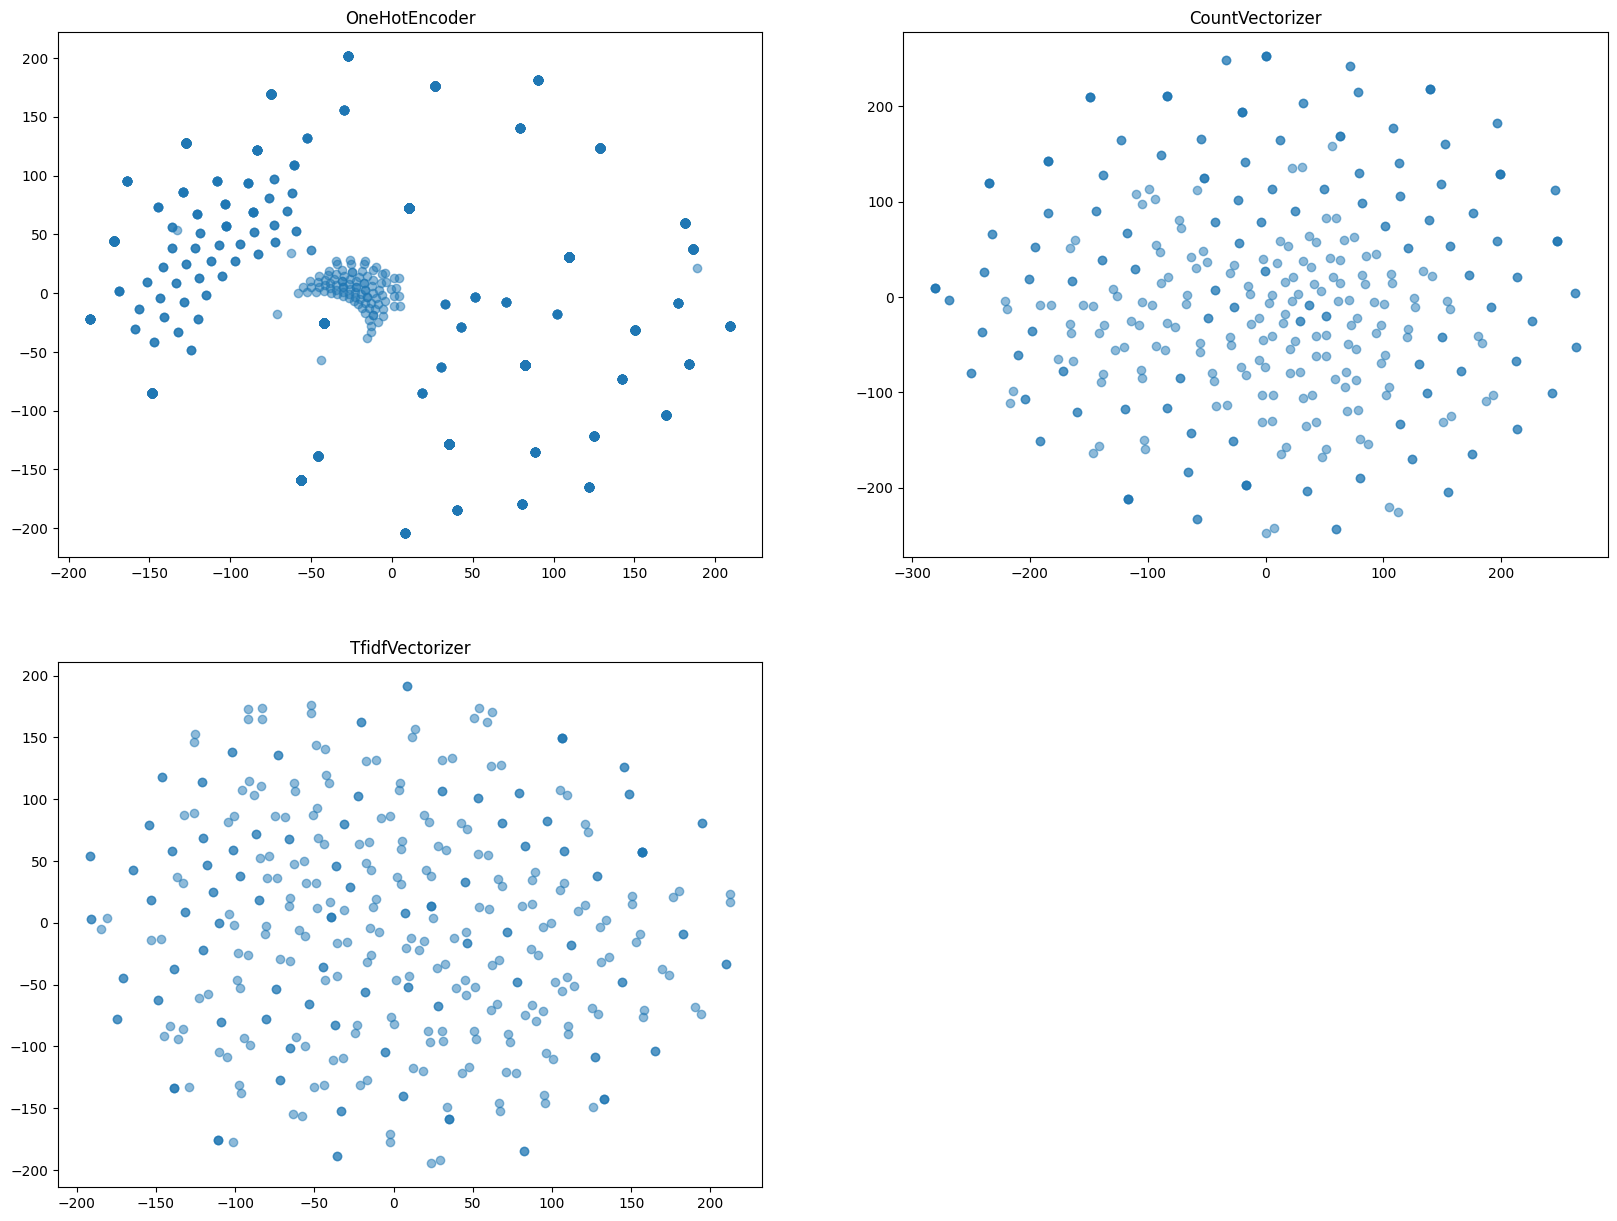

In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# List of dataframes
dfs = [encoded_df, bow_df, tfidf_df]

# List of labels
labels = ['OneHotEncoder', 'CountVectorizer', 'TfidfVectorizer']

# Create a figure
plt.figure(figsize=(20, 15))

# For each dataframe
for i, df in enumerate(dfs):
    # Initialize t-SNE
    tsne = TSNE(n_components=2, random_state=42)

    # Fit and transform the data
    tsne_results = tsne.fit_transform(df)

    # Create a subplot
    plt.subplot(2, 2, i+1)

    # Scatter plot
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5)

    # Title
    plt.title(labels[i])

# Show the plot
plt.show()

OneHotEncoder: The plot shows a concentrated cluster of data points with some outliers. This suggests that OneHotEncoder might provide a more defined and distinct representation of data, leading to clearer insights or patterns. However, it’s worth noting that OneHotEncoder leaded to high dimensionality as the data has many unique words.

CountVectorizer (Bag of Words): The plot shows data points scattered more evenly across the graph without a clear pattern. This suggests that the Bag of Words approach might not capture the semantic relationships between words as effectively as some other methods. However, it’s simple and efficient, making it a good choice for tasks where computational efficiency is a priority.

TfidfVectorizer: The plot shows data points scattered across the graph without a clear pattern. This suggests that the TfidfVectorizer approach might not capture the semantic relationships between words as effectively as some other methods. However, it does take into account the frequency of the word in the entire corpus, which can help to give more weight to the more “informative” words.

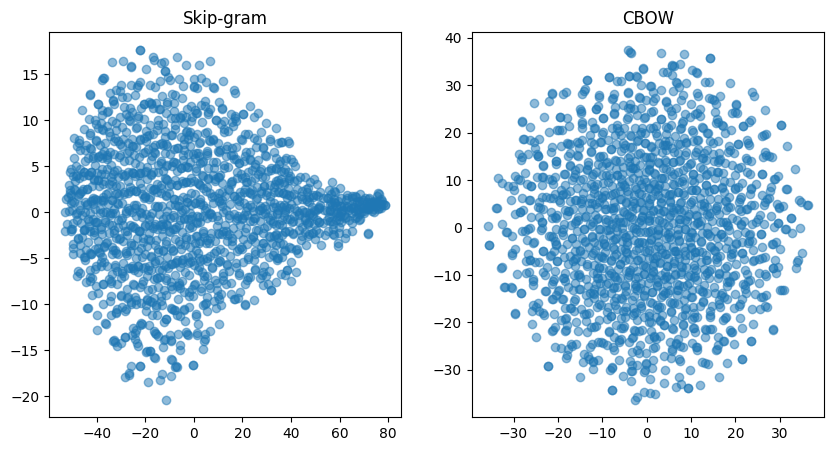

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# List of models
models = [model_skipgram, model_cbow]

# List of labels
labels = ['Skip-gram', 'CBOW']

# Create a figure
plt.figure(figsize=(10, 5))

# For each model
for i, model in enumerate(models):
    # Get the word vectors
    word_vectors = model.wv.vectors

    # Initialize t-SNE
    tsne = TSNE(n_components=2, random_state=42)

    # Fit and transform the data
    tsne_results = tsne.fit_transform(word_vectors)

    # Create a subplot
    plt.subplot(1, 2, i+1)

    # Scatter plot
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5)

    # Title
    plt.title(labels[i])

# Show the plot
plt.show()

Skip-gram: The plot shows a cluster of data points that are more spread out and have a directional pattern from the bottom left to the top right. This suggests that the Skip-gram approach might capture a wider range of semantic relationships between words, making it a good choice for tasks where capturing nuanced semantic information is important.

CBOW (Continuous Bag of Words): The plot shows a cluster of data points that are more concentrated in the center with less distinct patterns. This suggests that the CBOW approach might provide a more compact representation of data, making it a good choice for tasks where computational efficiency is a priority.

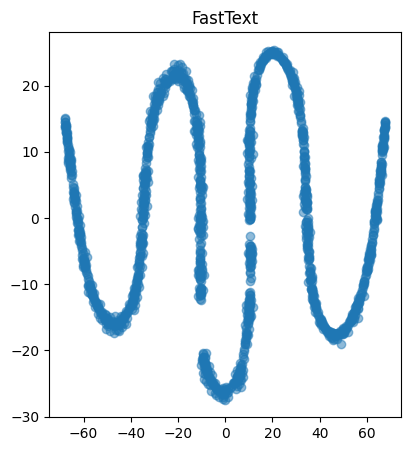

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# List of models
models = [model_fasttext]  # replace with your actual models

# List of labels
labels = ['FastText']

# Create a figure
plt.figure(figsize=(10, 5))

# For each model
for i, model in enumerate(models):
    # Get the word vectors
    word_vectors = model.wv.vectors  # Corrected here

    # Initialize t-SNE
    tsne = TSNE(n_components=2, random_state=42)

    # Fit and transform the data
    tsne_results = tsne.fit_transform(word_vectors)

    # Create a subplot
    plt.subplot(1, 2, i+1)

    # Scatter plot
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5)

    # Title
    plt.title(labels[i])

# Show the plot
plt.show()

FastText: The plot shows a wavy, blue line that represents some data or pattern, possibly related to word embeddings. This suggests that the FastText approach might capture complex patterns in the data, making it a good choice for tasks where capturing nuanced semantic information is important.